### <code>Bibliotecas</code>

In [ ]:
"""
@authors:
  - Anvil.sap
  - El milaneso
@date:
  2022/08/27
"""
import random as rdm
import sys 
import matplotlib.pyplot as plt

In [ ]:
# len: longitud del array que se quiere generar.
def mejorCaso(len):
  return [i+1 for i in range(len)]
def peorCaso(len):
  return [len-i for i in range(len)]
def casoPromedio(len):
  return [rdm.randint(-1000,1000) for i in range(len)]
def axsConfg(axs,X,Y,ylabel):
  axs.plot(X,Y)
  axs.set_ylabel(ylabel)

### Casos.
- #### Mejor.
Para este análisis donde el problema es ordenar un conjunto de datos, el mejor será tener un set ordenado.
- #### Peor.
El peor será tener nuestro set ordenado de manera inversa pues en teoría esto obliga a que todos los elementos deben ser ordenados y ninguno está en su posición correcta.
- #### Promedio.
Resulta ser aquel que tiene números pseudo-aleatorios.

# <code>BubbleSort</code><br>
Un algoritmo de ordenamiento que utiliza la estrategia "fuerza bruta" para ordenar datos numéricos

###Análisis

In [ ]:
def burbuja(mi_lista): 
    arreglo = len(mi_lista)      #5
    for i in range(arreglo):      #9(n+1)
        for j in range(arreglo - 1):      #8n(n-1)
            if mi_lista[j] > mi_lista[j + 1]:      #6n(n-1)
                temp = mi_lista[j]      #4n(n-1)
                mi_lista[j] = mi_lista[j+1]      #5n(n-1)
                mi_lista[j+1] = temp      #5n(n-1)


## $Polinomios.$
- ## Mejor Caso, Peor y Promedio.
$$
P(n)=28n-19n+14
$$
En este algoritmo la complejidad no cambia mucho debido a que aunque el arreglo este ordenado o desordenado, tiene que recorrer el arreglo n^2 veces y por lo tanto la complejidad no cambia.
$$
O(n^2) \\
\Omega(n^2) \\
\text{Dado que tanto la mejor como la peor complejidad son la misma entonces:} \\ \theta(n^2)
$$

## <code>Plots</code>

In [ ]:
def burbuja_graf(mi_lista): 
    cont = 0
    arreglo = len(mi_lista)
    for i in range(arreglo):
        for j in range(arreglo - 1):
            if mi_lista[j] > mi_lista[j + 1]:
                temp = mi_lista[j]
                mi_lista[j] = mi_lista[j+1]
                mi_lista[j+1] = temp
            cont+=1
    return cont

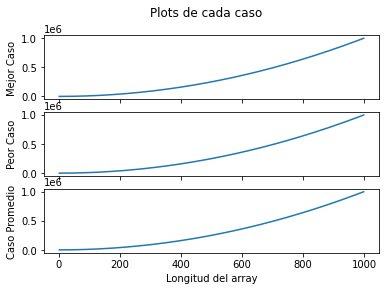

In [ ]:
from IPython.core.pylabtools import figsize
X = range(1,1000)
# Crea un array completamente nuevo para cada x de ahi el tiempo de ejecucion
# pero esto muestra la generalidad del algoritmo
Y_MC = [burbuja_graf(mejorCaso(x)) for x in X]
Y_PC = [burbuja_graf(peorCaso(x)) for x in X]
Y_CP = [burbuja_graf(casoPromedio(x)) for x in X]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1,sharex=True)
fig.suptitle('Plots de cada caso')
plt.xlabel("Longitud del array")

axsConfg(ax1,X,Y_MC,"Mejor Caso")
axsConfg(ax2,X,Y_PC,"Peor Caso")
axsConfg(ax3,X,Y_CP,"Caso Promedio")
plt.show()

# <code>MergeSort</code><br>
Es algoritmo de ordenamiento bastante famoso que utilizá la estrategia "divide y vencerás" para ordenar un conjunto de datos numéricos.
### Análisis.


In [ ]:
def CrearSubArreglo(A,indIzq,indDer):
  return A[indIzq:indDer+1]                     #6
def Merge(A,p,q,r):
  Izq = CrearSubArreglo(A,p,q)                  #6*1
  Der = CrearSubArreglo(A,q+1,r)                #8*1
  i = 0     #3
  j = 0     #3
  for k in range(p,r+1):                                        #8(n+1)
    if(j >= len(Der)) or (i < len(Izq) and Izq[i] < Der[j]):    #14n
      A[k] = Izq[i]                                             #4n
      i = i + 1                                                 #4n
    else:                                                       #n
      A[k] = Der[j]                                             #4n
      j = j + 1                                                 #4n
def MergeSort(A,p,r): #log_2(n)
  if r - p > 0:             #6log_2(n)
    q = int((r+p) / 2)      #7log_2(n)
    MergeSort(A,p,q)        #4log_2(n)*log_2(n)
    MergeSort(A,q+1,r)      #6log_2(n)*log_2(n)
    Merge(A,p,q,r)          #5n*log_2(n)

## $Polinomios.$
- ## Mejor Caso, Peor y Promedio.
$$
P(n)=5n\log_2(n)+10(\log_2(n))^2+13\log_2(n)
$$
La razón de que este sea para todos está en que el algoritmo no cambia mucho su comportamiento, <code>mergeSort</code> se llamara una cantidad de veces logarítmica, puesto que lo primero que se hace es seccionar el set. Quizá la que pueda cambiar sea la unión ordenada (<code>merge</code>) pero si hablamos de un set ordenado de manera correcta esta función rescribirá tal cual estaban los datos, la parte izq. seguía siendo la izq. y la der. más de los mismo. Para un set ordenado de manera completamente inversa lo que sucede es curioso, la izq. será la nueva der. y la der. la nueva izq. pero para ambos casos se mantendrá lineal. En un caso aleatorio tomará algunos de la der. o izq. dependiendo de quien sea el menor o si aún quedan en esa mitad.
$$
O(n\log_2n) \\
\Omega(n\log_2n) \\
\text{Dado que tanto la mejor como la peor complejidad son la misma entonces:} \\ \theta(n\log_2n)
$$

## <code>Plots</code>

In [ ]:
def Merge_graf(A,p,q,r):
  cont = 0
  Izq = CrearSubArreglo(A,p,q)                  
  Der = CrearSubArreglo(A,q+1,r)                
  i = 0     
  j = 0     
  for k in range(p,r+1):                                        
    if(j >= len(Der)) or (i < len(Izq) and Izq[i] < Der[j]):    
      A[k] = Izq[i]                                             
      i = i + 1                                                 
    else:                                                       
      A[k] = Der[j]                                             
      j = j + 1    
    cont+=1          
  return cont                                   
def MergeSort_graf(A,p,r,cont): 
  if r - p > 0:             
    q = int((r+p) / 2)      
    cont = MergeSort_graf(A,p,q,cont+1)        
    cont = MergeSort_graf(A,q+1,r,cont+1)      
    cont += Merge_graf(A,p,q,r)          
  return cont


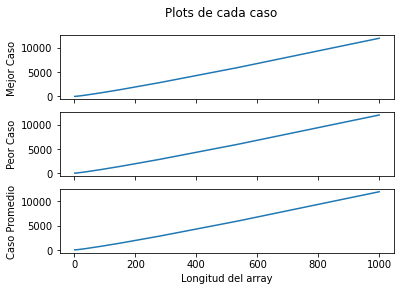

In [ ]:
from IPython.core.pylabtools import figsize
X = range(1,1001)
Y_MC = [MergeSort_graf(mejorCaso(x),0,x-1,0) for x in X]
Y_PC = [MergeSort_graf(peorCaso(x),0,x-1,0) for x in X]
Y_CP = [MergeSort_graf(casoPromedio(x),0,x-1,0) for x in X]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1,sharex=True)
fig.suptitle('Plots de cada caso')
plt.xlabel("Longitud del array")

axsConfg(ax1,X,Y_MC,"Mejor Caso")
axsConfg(ax2,X,Y_PC,"Peor Caso")
axsConfg(ax3,X,Y_CP,"Caso Promedio")
plt.show()